In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import cm
import matplotlib

import pandas as pd
import numpy as np
import csv
import sys

from astropy.io import ascii
import mpld3
from mpld3 import plugins, utils

#my own library for deg_hr, hr_deg
from ch_py import *

%matplotlib inline
pylab.rcParams['figure.figsize'] = 8, 5
#mpld3.enable_notebook()
#mpld3.disable_notebook()

In [2]:
def pspan(line):
    txt='P</span>'
    a=line.index(txt)
    b=line[a+9:a+13]
    try:
        return float(b)
    except ValueError:
        try:
            return float(b[:-1])
        except ValueError:
            return np.nan

def brp(line):
    txt='<br />P:'
    a=line.index(txt)
    b=line[a+8:a+12]
    try:
        return float(b)
    except ValueError:
        try:
            return float(b[:-1])
        except ValueError:
            return np.nan 
        
def gpa_1(line):
    txt='Overall GPA'
    d=line.index(txt)
    e=line[d+12:d+17]
    try:
        return float(e)
    except ValueError:
        try:
            return float(e[:-1])
        except:
            return np.nan
        
def gpa_2(line):      
    d=line.index('Overall GPA')
    e=line[d+19:d+24]
    try:
        return float(e)
    except ValueError:
        try:
            return float(e[:-1])
        except:
            return np.nan

def qspan(line):
    txt='Q</span>'
    a=line.index(txt)
    b=line[a+9:a+13]
    try:
        return float(b)
    except ValueError:
        try:
            return float(b[:-1])
        except ValueError:
            return np.nan

def brq(line):
    txt='Q:'
    a=line.index(txt)
    b=line[a+2:a+6]
    try:
        return float(b)
    except ValueError:
        try:
            return float(b[:-1])
        except ValueError:
            return np.nan 
        
#for i in content:
#    if 'Q</span>' in i:
#        qgre=qspan(i)
#        if 'Overall GPA' in i:
#            if not np.isnan(gpa_1(i)):
#                gpa=gpa_1(i)
#            elif not np.isnan(gpa_2(i)):
#                gpa=gpa_2(i)
#        else: 
#            gpa=np.nan
#        print qgre

In [3]:
columns = ['pgre','qgre','gpa']
index=range(0,120)
df= pd.DataFrame(index=index, columns=columns)
        
with open('/Users/taweewat/Documents/data_visualization/gre_score/p2.txt') as f:
    c1 = f.readlines()
with open('/Users/taweewat/Documents/data_visualization/gre_score/p3.txt') as f:
    c2 = f.readlines()
with open('/Users/taweewat/Documents/data_visualization/gre_score/p4.txt') as f:
    c3 = f.readlines()
    
content=c1+c2+c3
j=0
for i in content:
    if 'P</span>' in i:
        pgre=pspan(i)
    elif '<br />P:' in i:
        pgre=brp(i)
    else:
        continue
        
    if 'Q</span>' in i:
        qgre=qspan(i)
    elif 'Q:' in i:
        qgre=brq(i)
    else:
        continue
        
    if 'Overall GPA' in i:
        if not np.isnan(gpa_1(i)):
            gpa=gpa_1(i)
        elif not np.isnan(gpa_2(i)):
            gpa=gpa_2(i)
    else: 
        gpa=np.nan


    if pgre>=200.0 and pgre<1000.0 and gpa<=4.0 and qgre>100.0 and qgre<200.0: 
        df.pgre[j]=pgre
        df.gpa[j]=gpa
        df.qgre[j]=qgre
        j=j+1
    else:
        pass

df2=df.dropna()

In [4]:
df2

,pgre,qgre,gpa
0,910,167,3.67
1,910,167,3.94
2,750,162,3.4
3,990,170,4
4,870,170,3.3
5,640,164,3.6
6,960,165,3.6
7,910,164,3.62
8,910,166,3.93
9,990,168,4


In [5]:
columns = ['pgre','qgre','gpa']
index=range(0,120)
df= pd.DataFrame(index=index, columns=columns)
        
with open('/Users/taweewat/Documents/data_visualization/gre_score/q2.txt') as f:
    c1 = f.readlines()
with open('/Users/taweewat/Documents/data_visualization/gre_score/q3.txt') as f:
    c2 = f.readlines()
with open('/Users/taweewat/Documents/data_visualization/gre_score/q4.txt') as f:
    c3 = f.readlines()
    
content=c1+c2+c3
j=0
for i in content:
    if 'P</span>' in i:
        pgre=pspan(i)
    elif '<br />P:' in i:
        pgre=brp(i)
    else:
        continue
        
    if 'Q</span>' in i:
        qgre=qspan(i)
    elif 'Q:' in i:
        qgre=brq(i)
    else:
        continue
        
    if 'Overall GPA' in i:
        if not np.isnan(gpa_1(i)):
            gpa=gpa_1(i)
        elif not np.isnan(gpa_2(i)):
            gpa=gpa_2(i)
    else: 
        gpa=np.nan


    if pgre>=200.0 and pgre<1000.0 and gpa<=4.0 and qgre>100.0 and qgre<200.0: 
        df.pgre[j]=pgre
        df.gpa[j]=gpa
        df.qgre[j]=qgre
        j=j+1
    else:
        pass

df3=df.dropna()

In [6]:
df2['year']=pd.Series('blue', index=df2.index)
df3['year']=pd.Series('red', index=df3.index)

dff=pd.concat([df2,df3])

/Users/taweewat/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


TypeError: array([ 1.]) is not JSON serializable

TypeError: array([ 1.]) is not JSON serializable

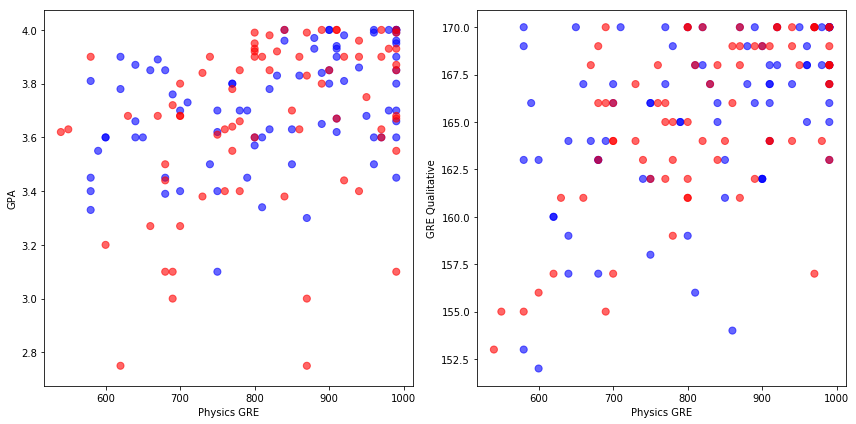

In [7]:
mpld3.enable_notebook()
#mpld3.disable_notebook()

fig, ax = plt.subplots(1, 2, figsize=(12,6))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

point=ax[0].scatter(dff.pgre, dff.gpa, s=50.0, label='2015', c=dff.year, alpha=0.6)
ax[0].set_xlabel('Physics GRE')
ax[0].set_ylabel('GPA')
#ax[0].legend(loc='best')

point=ax[1].scatter(dff.pgre, dff.qgre, s=50.0, label='2015', c=dff.year, alpha=0.6)
ax[1].set_xlabel('Physics GRE')
ax[1].set_ylabel('GRE Qualitative')
#ax[1].legend(loc='best')

plt.tight_layout()
plugins.connect(fig, plugins.LinkedBrush(point))

#x=mpld3.fig_to_html(fig, d3_url="http://d3js.org/d3.v3.min.js", mpld3_url="http://mpld3.github.io/js/mpld3.v0.1.js",\
#                  no_extras=False, template_type='simple', figid=None, use_http=False)
x=mpld3.fig_to_html(fig,no_extras=False, template_type='general', figid=None, use_http=False)

In [17]:
## write out the html
text_file = open("/Users/taweewat/Documents/data_visualization/gre_score/fig.html", "w")
text_file.write("%s" % x)
text_file.close()

In [ ]:
with open('/Users/taweewat/Documents/gre_score/p2.txt') as f:
    content = f.readlines()
    
lpgre3=[]
lgpa3=[]
for line in content:
    txt='P</span>'
    if txt in line:
        a=line.index(txt)
        b=line[a+9:a+13]
        try:
            pgre=float(b)
        except ValueError:
            try:
                pgre=float(b[:-1])
            except ValueError:
                continue
        try:
            d=line.index('Overall GPA')
            e=line[d+19:d+24]
            #print e
            #print 'old'+e
            try:
                gpa=float(e)
                #print gpa
            except ValueError:
                gpa=float(e[:-1])
        except:
            pass    
        print '=>', pgre, gpa
        if pgre>=200.0 and pgre<1000.0 and gpa<5.0:
            lpgre3.append(pgre)
            lgpa3.append(gpa)
    
    elif '<br />P:' in line:
        a=line.index('<br />P:')
        b=line[a+8:a+12]
        try:
            pgre=float(b)
        except ValueError:
            pgre='na'

        print '=>', pgre
        
        
        
print len(lpgre3), len(lgpa3) 